<a href="https://colab.research.google.com/github/ailab-nda/ML/blob/main/Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 実験しながらのOptimizer解説
by CyberWei

https://www.cyberwei.com/archives/230530jp

In [1]:
import torch
import torch.optim as optim
from torch.optim import lr_scheduler
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from multiprocessing import Pool
import multiprocessing

e = 2.718281828459045
pi = 3.14159265359

In [2]:
def loss_fn_1(para):
    return 20 * (para[0] ** 2) + 2 * (para[1] ** 2)
def loss_fn_2(para):
    return 2 * (para[0] ** 2) + 10 * (para[1] ** 2) + 10 * (e**(para[1]*5j)).imag
def loss_fn_3(para):
    return 20 * (para[0] ** 2) + 2 * (para[1] ** 2) + (e**(para[1]*5j)).imag

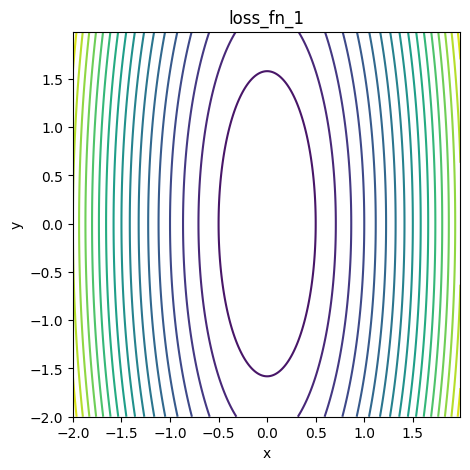

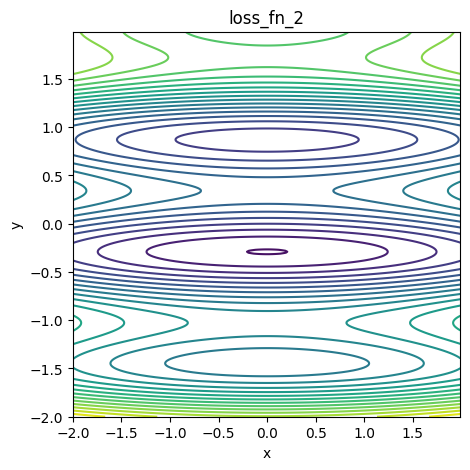

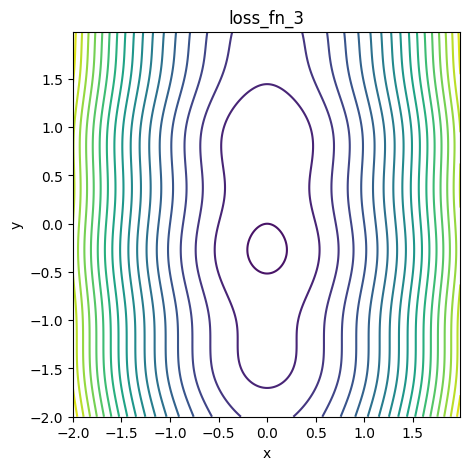

In [3]:
class show_plot():
    def __init__(self):
        a = np.arange(-2, 2, 0.01)
        b = np.arange(-2, 2, 0.01)
        self.X, self.Y = np.meshgrid(a, b)
    def show(self, loss_fn):
        plt.figure(figsize=(5,5))
        Z = loss_fn([self.X,self.Y])
        plt.contour(self.X, self.Y, Z, levels=20)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(loss_fn.__name__)
        plt.show()

show = show_plot()

show.show(loss_fn_1)
show.show(loss_fn_2)
show.show(loss_fn_3)

In [4]:
def step_calculate(optimizer, loss_fn):
    loss_previous = 0
    for i in range(200):
        optimizer.zero_grad()
        loss = loss_fn(*optimizer.param_groups[0]['params'])
        loss.backward()
        optimizer.step()
        if abs(loss - loss_previous) < 0.01:
            break;
        loss_previous = loss
    return i

def route_calculate(optimizer, loss_fn):
    history = []
    for i in range(50):
        optimizer.zero_grad()
        history.append([*optimizer.param_groups[0]['params'][0].detach().tolist()])
        loss = loss_fn(*optimizer.param_groups[0]['params'])
        loss.backward()
        optimizer.step()
    return history

# 降下ルート

Calculating [route_with_different_location_SGD]...
Calculating [route_with_different_location_SGDm]...
Calculating [route_with_different_location_Adagrad]...
Calculating [route_with_different_location_RMSprop]...
Calculating [route_with_different_location_Adadelta]...
Calculating [route_with_different_location_ADAM]...
Calculating [route_with_different_location_ADAMW]...
Calculating [route_with_different_location_SGDs]...
Calculating [route_with_different_location_SGDms]...


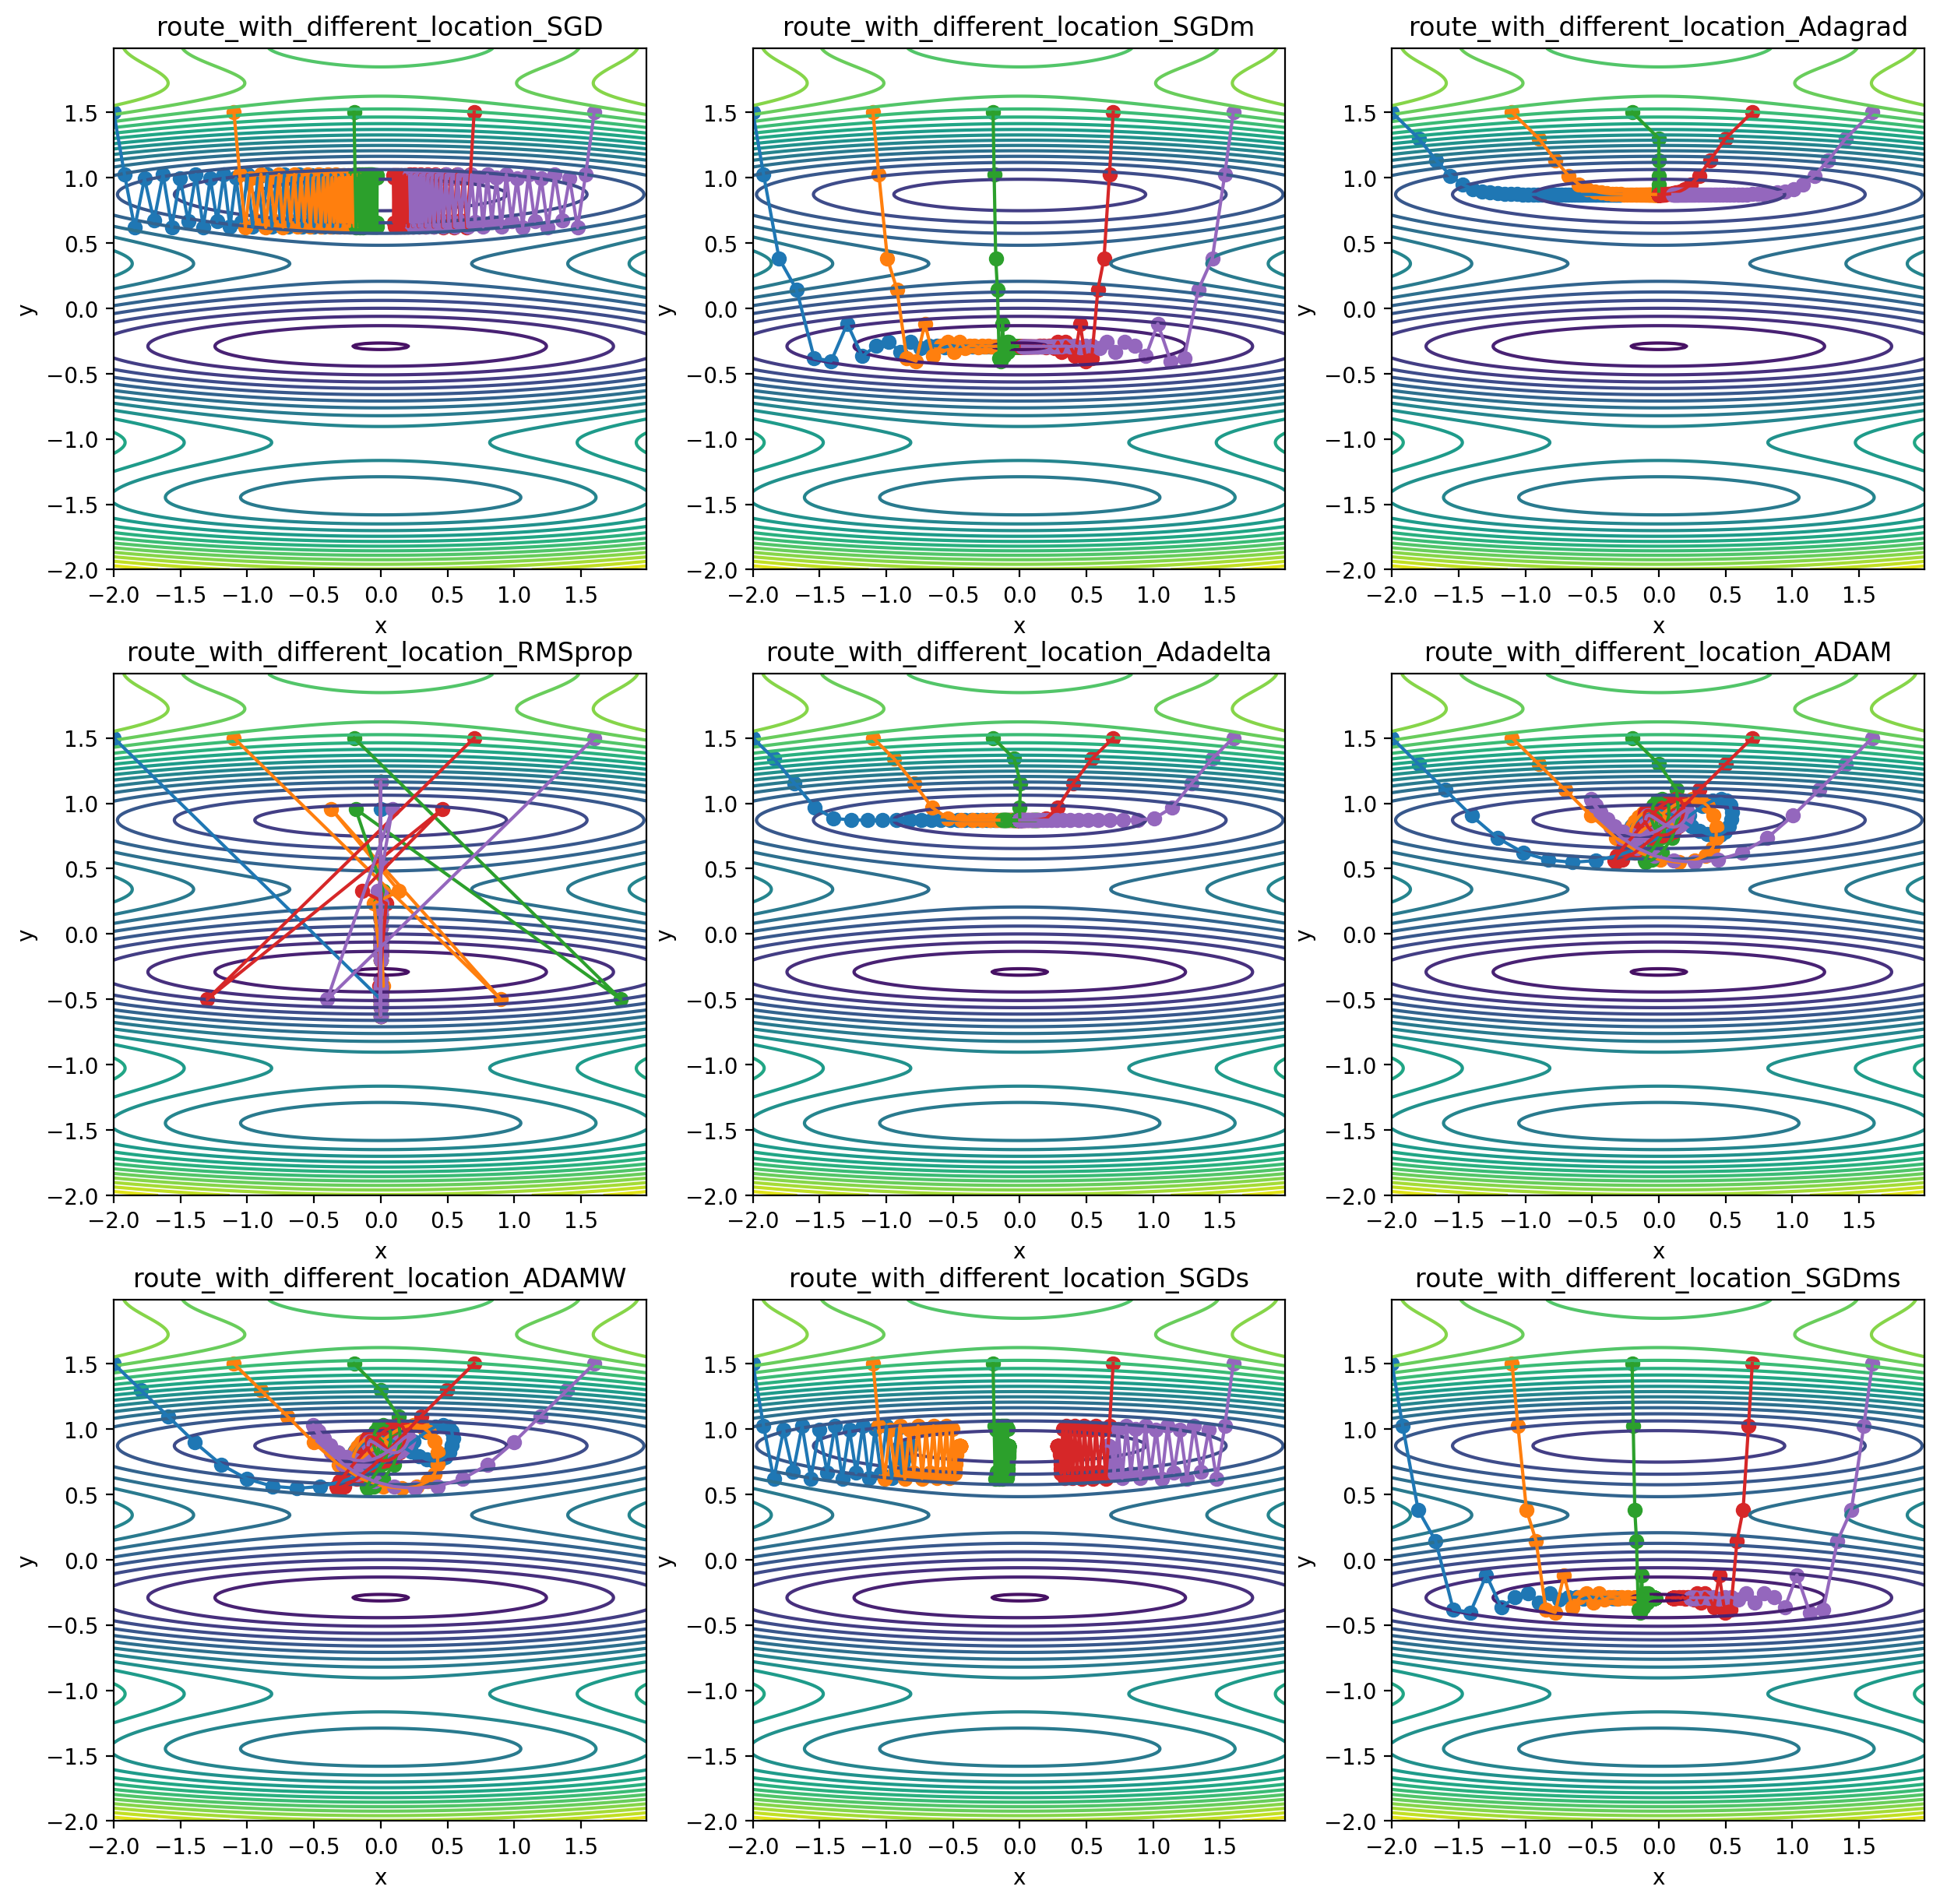

In [5]:
loss_fn = loss_fn_2
lr = 0.2

def route_with_different_location_SGD(p):
    param = torch.tensor(p, requires_grad=True)
    optimizer = optim.SGD([param], lr = 0.01)
    return route_calculate(optimizer, loss_fn)

def route_with_different_location_SGDm(p):
    param = torch.tensor(p, requires_grad=True)
    optimizer = optim.SGD([param], lr = 0.01, momentum = 0.5)
    return route_calculate(optimizer, loss_fn)

def route_with_different_location_Adagrad(p):
    param = torch.tensor(p, requires_grad=True)
    optimizer = optim.Adagrad([param], lr = lr)
    return route_calculate(optimizer, loss_fn)

def route_with_different_location_RMSprop(p):
    param = torch.tensor(p, requires_grad=True)
    optimizer = optim.RMSprop([param], lr = lr)
    return route_calculate(optimizer, loss_fn)

def route_with_different_location_Adadelta(p):
    param = torch.tensor(p, requires_grad=True)
    optimizer = optim.Adadelta([param], lr = 50.0)
    return route_calculate(optimizer, loss_fn)

def route_with_different_location_ADAM(p):
    param = torch.tensor(p, requires_grad=True)
    optimizer = optim.Adam([param], lr = lr)
    return route_calculate(optimizer, loss_fn)

def route_with_different_location_ADAMW(p):
    param = torch.tensor(p, requires_grad=True)
    optimizer = optim.AdamW([param], lr = lr)
    return route_calculate(optimizer, loss_fn)


def route_with_different_location_SGDs(p):
    param = torch.tensor(p, requires_grad=True)
    optimizer = optim.SGD([param], lr = 0.01)
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
    history = []
    for i in range(50):
        optimizer.zero_grad()
        history.append([*optimizer.param_groups[0]['params'][0].detach().tolist()])
        loss = loss_fn(*optimizer.param_groups[0]['params'])
        loss.backward()
        optimizer.step()
        exp_lr_scheduler.step()
    return history

def route_with_different_location_SGDms(p):
    param = torch.tensor(p, requires_grad=True)
    optimizer = optim.SGD([param], lr = 0.01, momentum = 0.5)
    exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)
    history = []
    for i in range(50):
        optimizer.zero_grad()
        history.append([*optimizer.param_groups[0]['params'][0].detach().tolist()])
        loss = loss_fn(*optimizer.param_groups[0]['params'])
        loss.backward()
        optimizer.step()
        exp_lr_scheduler.step()
    return history

route_with_different_locations = [route_with_different_location_SGD,
                               route_with_different_location_SGDm,
                               route_with_different_location_Adagrad,
                               route_with_different_location_RMSprop,
                               route_with_different_location_Adadelta,
                               route_with_different_location_ADAM,
                               route_with_different_location_ADAMW,
                               route_with_different_location_SGDs,
                               route_with_different_location_SGDms]

x_start, y_start = np.arange(-2, 2.1, 0.9), np.arange(1.5, 2.1, 0.9)
X_start, Y_start = np.meshgrid(x_start, y_start)

if __name__ == "__main__":
    fig = plt.figure(figsize=(15, (int(len(route_with_different_locations) / 3) + 1) * 5), dpi = 200)
    for index, route_with_different_location in enumerate(route_with_different_locations):
        print(f'Calculating [{route_with_different_location.__name__}]...')

        plt.subplot(int(len(route_with_different_locations)/3) + 1, 3, index + 1)
        plt.title(route_with_different_locations[index].__name__)
        plt.xlabel('x')
        plt.ylabel('y')
        a = np.arange(-2, 2, 0.01)
        b = np.arange(-2, 2, 0.01)
        X, Y = np.meshgrid(a, b)
        Z = loss_fn([X,Y])
        plt.contour(X, Y, Z, levels=20)

        with Pool(4) as p:
            routes = np.array(p.map(route_with_different_location, zip(X_start.flatten(),Y_start.flatten())))
        for index, a in enumerate(routes):
            route = routes[index]
            plt.plot(route[:,0],route[:,1])
            plt.scatter(route[:,0], route[:,1])


    plt.show()

# 学習率のオプティマイザへの影響
(Takes some time to calculate)

Calculating [step_with_different_lr_SGD]...
Finish!
Calculating [step_with_different_lr_SGDm]...
Finish!
Calculating [step_with_different_lr_Adagrad]...
Finish!
Calculating [step_with_different_lr_RMSprop]...
Finish!
Calculating [step_with_different_lr_ADAM]...
Finish!
Calculating [step_with_different_lr_ADAMW]...
Finish!


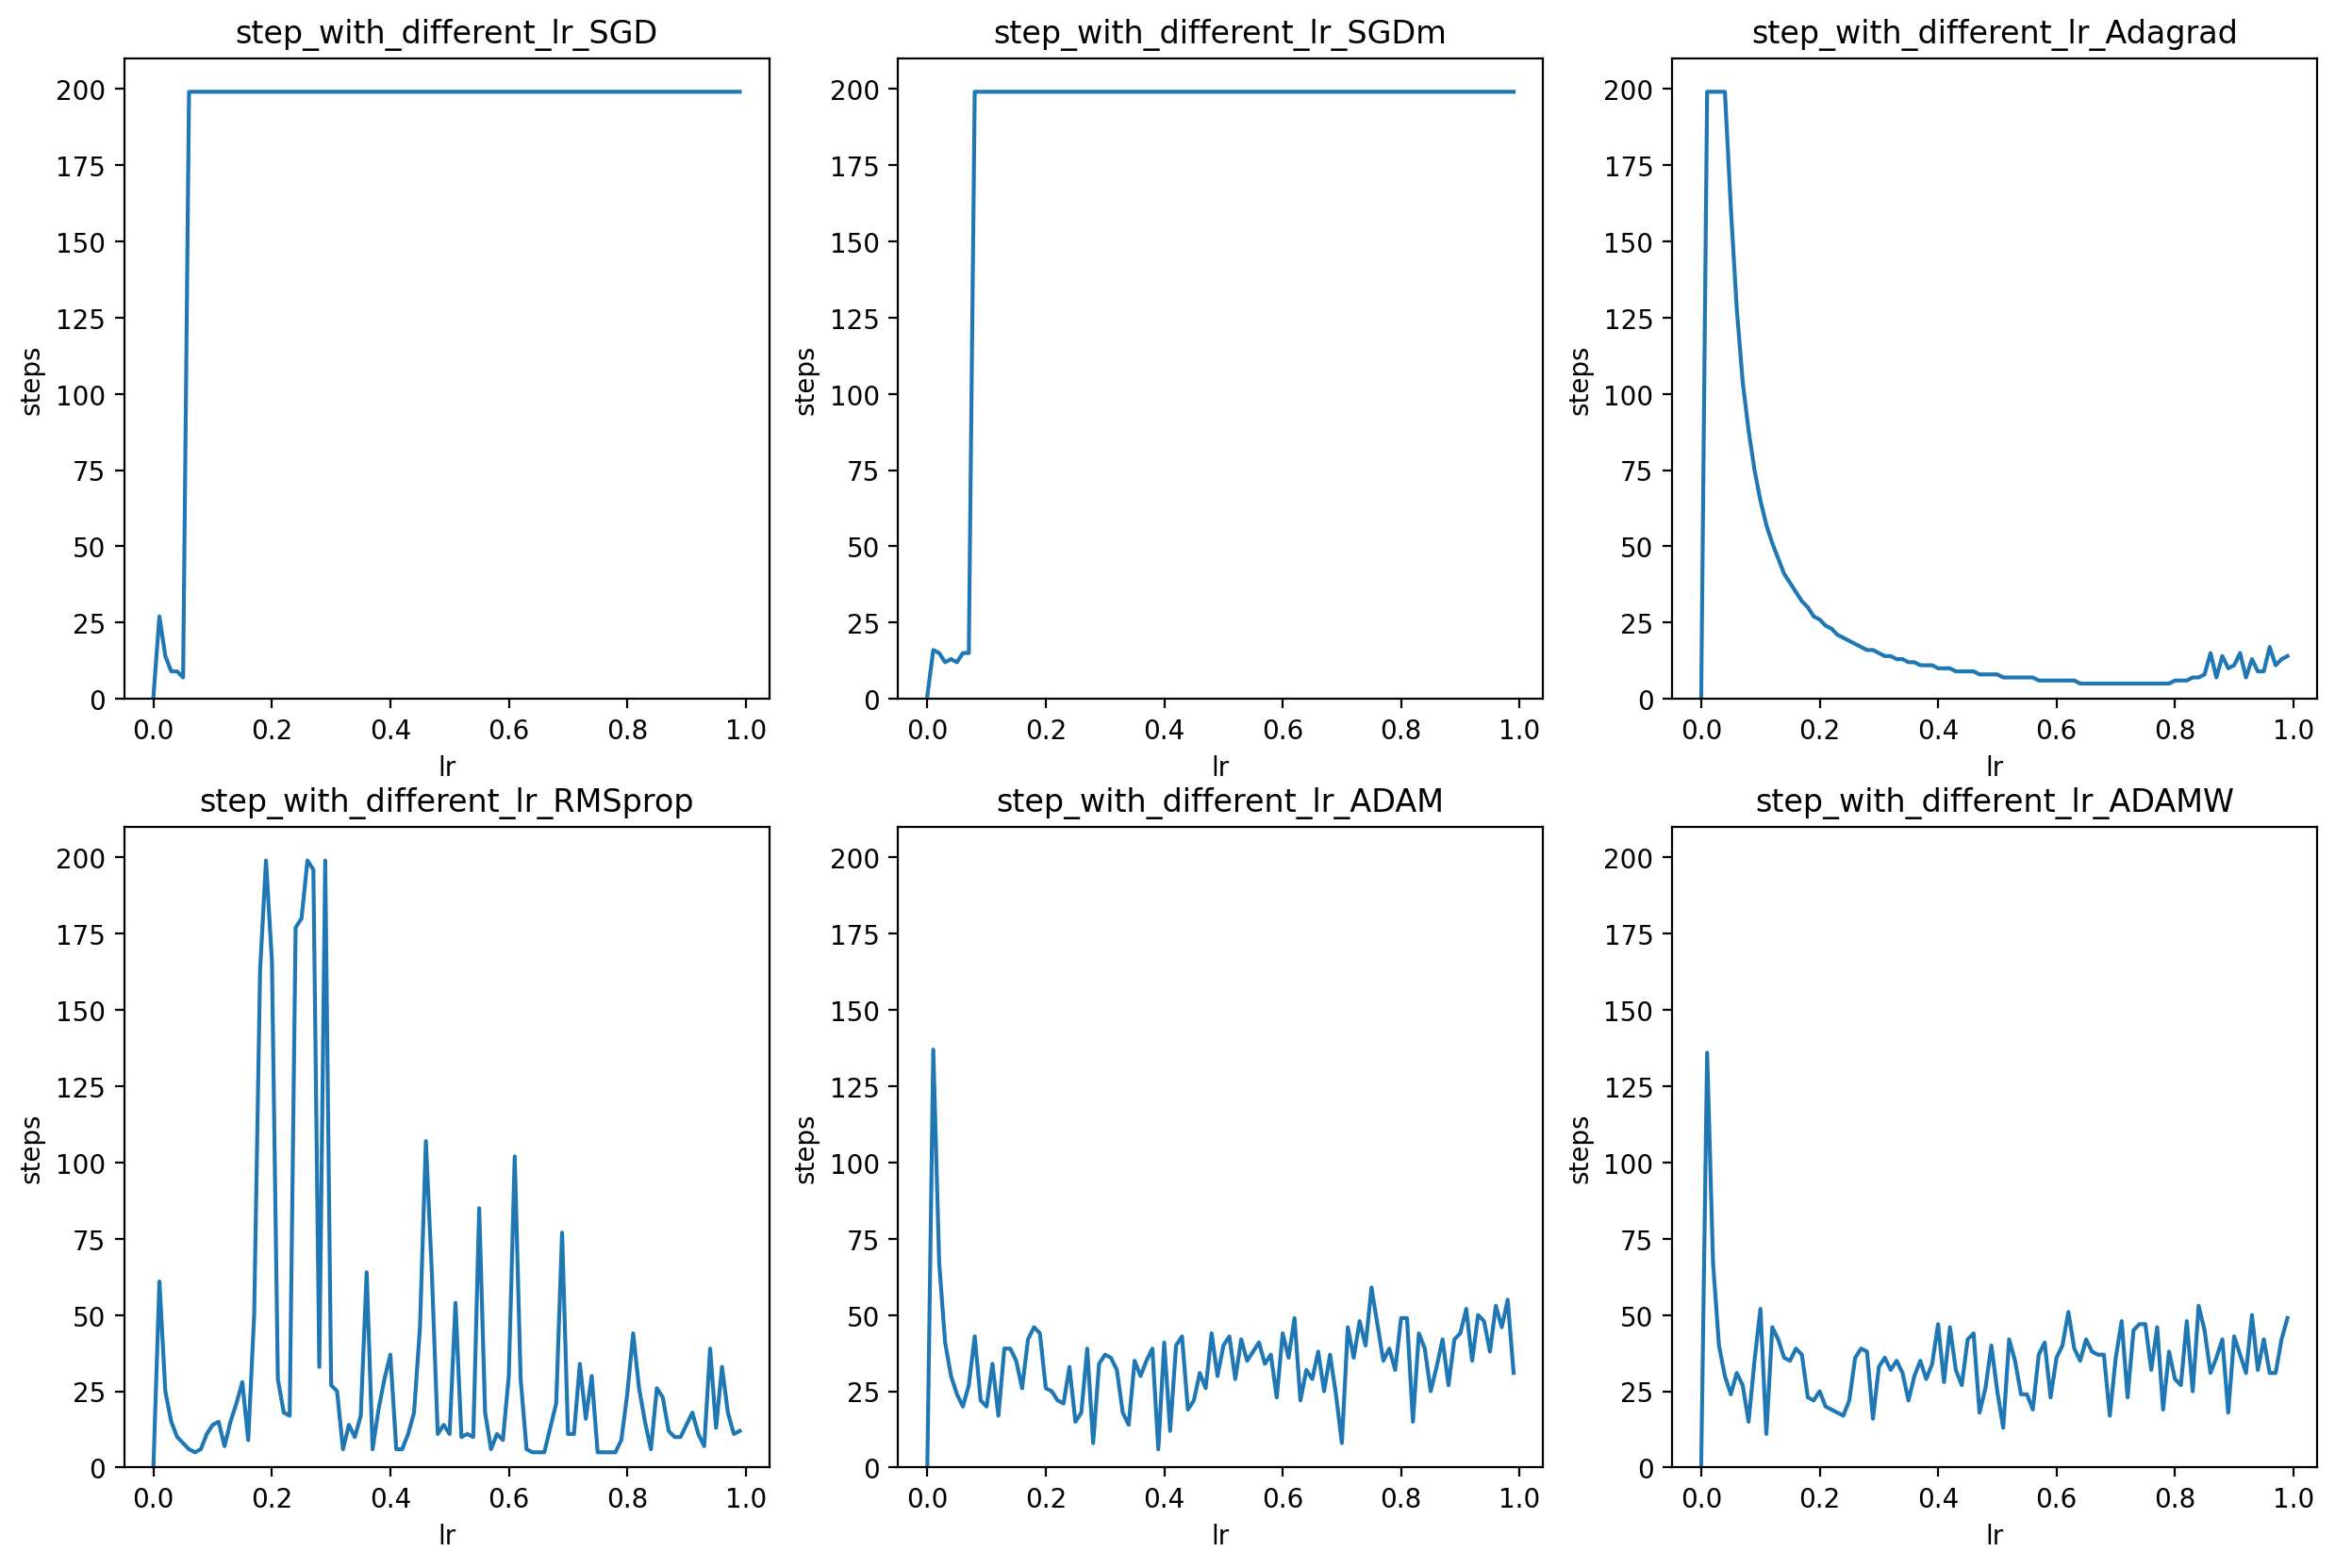

In [6]:
loss_fn = loss_fn_3

def step_with_different_lr_SGD(lr):
    param = torch.tensor([x,y], requires_grad=True)
    optimizer = optim.SGD([param], lr = lr)
    return lr, step_calculate(optimizer, loss_fn)

def step_with_different_lr_SGDm(lr):
    param = torch.tensor([x,y], requires_grad=True)
    optimizer = optim.SGD([param], lr = lr, momentum = 0.5)
    return lr, step_calculate(optimizer, loss_fn)

def step_with_different_lr_Adagrad(lr):
    param = torch.tensor([x,y], requires_grad=True)
    optimizer = optim.Adagrad([param], lr = lr)
    return lr, step_calculate(optimizer, loss_fn)

def step_with_different_lr_RMSprop(lr):
    param = torch.tensor([x,y], requires_grad=True)
    optimizer = optim.RMSprop([param], lr = lr)
    return lr, step_calculate(optimizer, loss_fn)

def step_with_different_lr_Adadelta(lr):
    param = torch.tensor([x,y], requires_grad=True)
    optimizer = optim.Adadelta([param], lr = lr)
    return lr, step_calculate(optimizer, loss_fn)

def step_with_different_lr_ADAM(lr):
    param = torch.tensor([x,y], requires_grad=True)
    optimizer = optim.Adam([param], lr = lr)
    return lr, step_calculate(optimizer, loss_fn)

def step_with_different_lr_ADAMW(lr):
    param = torch.tensor([x,y], requires_grad=True)
    optimizer = optim.AdamW([param], lr = lr)
    return lr, step_calculate(optimizer, loss_fn)



step_with_different_lrs = [step_with_different_lr_SGD,
                           step_with_different_lr_SGDm,
                           step_with_different_lr_Adagrad,
                           step_with_different_lr_RMSprop,
                           #step_with_different_lr_Adadelta,
                           step_with_different_lr_ADAM,
                           step_with_different_lr_ADAMW]

x, y = 1.0, 2.0 #Starting point
data = np.arange(0, 1, 0.01) #Range of Learning Rate

if __name__ == "__main__":
    fig = plt.figure(figsize=(15, (int(len(step_with_different_lrs) / 3) + 1) * 5), dpi = 200)
    for index, step_with_different_lr in enumerate(step_with_different_lrs):
        print(f'Calculating [{step_with_different_lrs[index].__name__}]...')
        with Pool(4) as p:
            step = np.array(p.map(step_with_different_lr, data))
        print('Finish!')
        plt.subplot(int(len(step_with_different_lrs)/3) + 1, 3, index + 1)
        plt.plot(step[:,0],step[:,1])
        plt.xlabel('lr')
        plt.ylabel('steps')
        plt.ylim((0,210))
        plt.title(step_with_different_lrs[index].__name__)
    plt.show()